<a href="https://colab.research.google.com/github/SusanShibu/ML-classifiers-comparison/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

#task1
df=pd.read_csv('/content/drive/MyDrive/ML Project/heart.csv');
x=df.iloc[:,0:-1].values; #: incdicates all rows,0:-1 indicates columns from 0 to -1(excluding -1)
y=df.iloc[:,-1].values; #-1 indicates last column only



FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/MyDrive/ML Project/heart.csv'

In [ ]:
df.shape

In [ ]:
x_scaled=StandardScaler().fit_transform(x)

In [ ]:
pca = PCA(n_components=2)
pca_features=pca.fit_transform(x_scaled)

In [ ]:
pca_df = pd.DataFrame(data=pca_features, columns = ['PC1','PC2'])
print(pca_df.head())

        PC1       PC2
0  0.624111  2.321270
1 -0.455988 -0.957351
2 -1.828805  0.042885
3 -1.716006 -0.495337
4 -0.371356  0.301156


In [ ]:
pca_df['target']=y

In [ ]:
pca_df

,PC1,PC2,target
0,0.624111,2.321270,1
1,-0.455988,-0.957351,1
2,-1.828805,0.042885,1
3,-1.716006,-0.495337,1
4,-0.371356,0.301156,1
...,...,...,...
298,1.146672,-0.519529,0
299,-0.708593,-1.045752,0
300,2.459005,0.478262,0
301,1.762755,-2.336816,0


In [ ]:

x = pca_df.iloc[:, :-1].values
y = pca_df.iloc[:, -1].values

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create and train the SVM model
classifier = SVC(kernel='linear', probability=True)
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 0.8360655737704918


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print('Confusion mmatrix of SVM')
print(cm)


Confusion mmatrix of SVM
[[24  5]
 [ 5 27]]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report of SVM:\n', classification_report(y_test, y_pred))

Classification Report of SVM:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



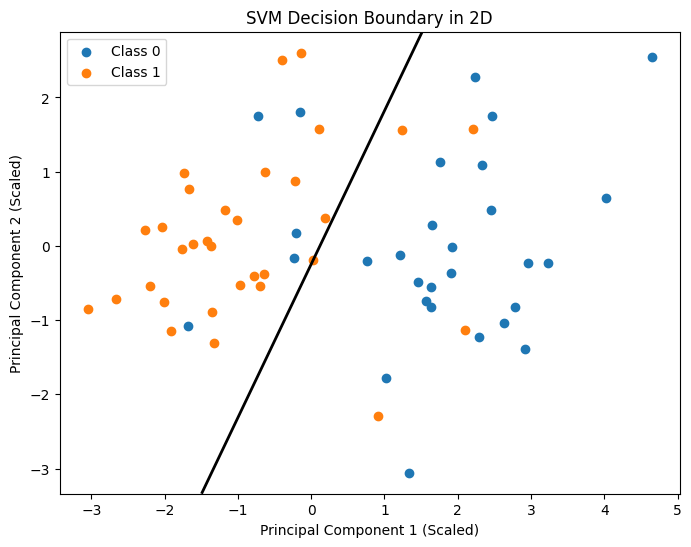

In [ ]:
# Plot decision boundary in 2D
plt.figure(figsize=(8, 6))

# Plot data points
for c in np.unique(y):
    plt.scatter(X_test[y_test == c, 0], X_test[y_test == c, 1], label=f'Class {c}')

# Plot decision boundary
ax = plt.gca()
xlim = ax.get_xlim() #nparray
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100)) #nparray

Z = classifier.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')

# Customize plot
plt.xlabel('Principal Component 1 (Scaled)')
plt.ylabel('Principal Component 2 (Scaled)')
plt.title('SVM Decision Boundary in 2D')

# Add a legend
ax.legend()

plt.show()

plt.show()

In [ ]:
y_prob = classifier.predict_proba(X_test)[:, 1]

In [ ]:
fpr1, tpr1, _ = roc_curve(y_test, y_prob)
roc_auc1 = auc(fpr1, tpr1)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

x=df.iloc[:,0:-1].values; #: incdicates all rows,0:-1 indicates columns from 0 to -1(excluding -1)
y=df.iloc[:,-1].values;

x_scaled=StandardScaler().fit_transform(x)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
classifier2 = RandomForestClassifier(n_estimators=100, random_state=42)
classifier2.fit(X_train, y_train)

# Make predictions
y_pred2 = classifier2.predict(X_test)

# Probability estimates for the positive class
y_prob2 = classifier2.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy2 = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy2}')


Accuracy: 0.8360655737704918


In [ ]:
'''from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Choose the index of the tree you want to visualize (e.g., the first tree)
tree_index = 0

# Extract the decision tree from the Random Forest
tree_estimator = classifier2.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(tree_estimator, feature_names=df.columns[:-1], class_names=list(map(str, classifier2.classes_)), filled=True, rounded=True)
plt.show()'''

'from sklearn.tree import plot_tree\nimport matplotlib.pyplot as plt\n\n# Choose the index of the tree you want to visualize (e.g., the first tree)\ntree_index = 0\n\n# Extract the decision tree from the Random Forest\ntree_estimator = classifier2.estimators_[tree_index]\n\n# Plot the decision tree\nplt.figure(figsize=(15, 10))\nplot_tree(tree_estimator, feature_names=df.columns[:-1], class_names=list(map(str, classifier2.classes_)), filled=True, rounded=True)\nplt.show()'

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm2 = confusion_matrix(y_test, y_pred2)
print('Confusion mmatrix of RF')
print(cm2)

Confusion mmatrix of RF
[[24  5]
 [ 5 27]]


In [ ]:

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
print('Classification Report of Random Forest Classifier:\n', classification_report(y_test, y_pred2))



Classification Report of Random Forest Classifier:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61



In [ ]:
# Compute ROC curve and ROC area
fpr2, tpr2, _ = roc_curve(y_test, y_prob2)
roc_auc2 = auc(fpr2, tpr2)

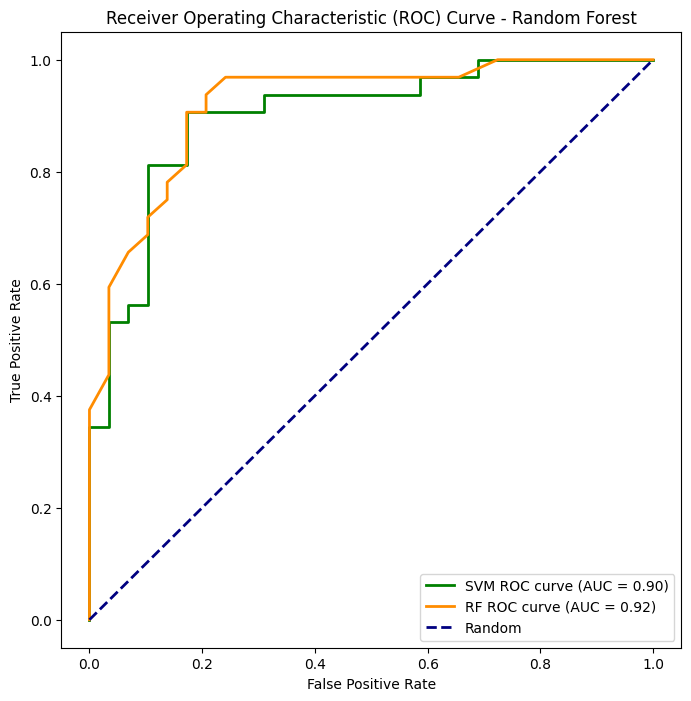

In [ ]:
# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr1, tpr1, color='green', lw=2, label=f'SVM ROC curve (AUC = {roc_auc1:.2f})')
plt.plot(fpr2, tpr2, color='darkorange', lw=2, label=f'RF ROC curve (AUC = {roc_auc2:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest')
plt.legend(loc='lower right')
plt.show()